In [13]:
import qiskit
from qiskit_aer import AerSimulator
from qiskit import transpile, QuantumCircuit
from qiskit_aer import noise
from qiskit.quantum_info import Statevector
import math
from qiskit.visualization import plot_histogram, plot_state_city
import time
from qiskit_aer import Aer
simulator = Aer.get_backend('qasm_simulator')

Aer is qiskit simulator in general
it has three types of backends.

qasm_simulator: Simulates a quantum circuit using shot-based measurements (as if you’re running on real quantum hardware).
statevector_simulator: Simulates the entire quantum state vector without measurements (useful for debugging and analysis).
unitary_simulator: Simulates the unitary matrix that represents the quantum operations applied by the circuit.

In [41]:
# pylint: disable=no-member
class CustomSimulator:
    def __init__(self, method='qasm_simulator',initial_state=None):
        # Initialize the backend based on the method
        self.backend_name = method
        self.backend = Aer.get_backend(self.backend_name)
        self.initial_state = initial_state
    def run_and_keep(self, qc_i, shots=1024, noise=0, noise_model=None):

        if noise == 0:
            qc = QuantumCircuit(qc_i.num_qubits)
            
            if self.initial_state != None:
                qc.set_statevector(self.initial_state)
            qc.compose(qc_i, inplace=True, front=False)
            qc.save_statevector()
            qc = transpile(qc, self.backend)
            result = self.backend.run(qc, shots=shots).result()
            output_state = result.get_statevector(qc)

        elif noise == 1:
            qc = QuantumCircuit(qc_i.num_qubits)
          
            if self.initial_state != None:
                qc.set_density_matrix(self.initial_state)
            qc.compose(qc_i,inplace=True,front=False)
            qc.save_density_matrix()
            qc = transpile(qc, self.backend)
            result = self.backend.run(qc, shots=shots, noise_model=noise_model).result()
            output_state = result.data(0)['density_matrix']

        self.initial_state = output_state

        return result, output_state, qc
    
    def reset_state(self):
        self.initial_state = None



90.99160000914708


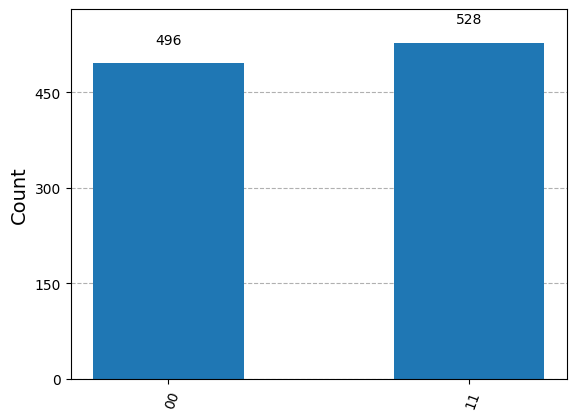

In [58]:
qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.cx(0, 1)
noiseless_simulator = CustomSimulator(method='qasm_simulator')
a = time.perf_counter()
result1, sv_1, qc1 = noiseless_simulator.run_and_keep(qc1, shots=1024)
b = time.perf_counter()
# print(a)
# print(b)
print((b - a)*1000)
qc2 = QuantumCircuit(2,2)
qc2.measure(0,0)
qc2.measure(1,1)
result2, sv_2, qc2 = noiseless_simulator.run_and_keep(qc2)
# print(sv_1)
# print(sv_2)
# print(result2.data())
# data = [result1.get_counts(),result2.get_counts()]
# plot_histogram(data, legend=['counts before measurements','counts after measurements'] ,title='Historgam')
plot_histogram(result2.get_counts())

In [56]:
# NORMAL RUN COMPLEXITY

sim = Aer.get_backend('qasm_simulator')
qc3 = QuantumCircuit(2)
qc3.h(0)
qc3.cx(0, 1)

c = time.perf_counter()
result = sim.run(qc3,shots=1024).result()
d = time.perf_counter()

print((d-c)*1000)

2.362700004596263
